<a href="https://colab.research.google.com/github/harperd17/energy_volatility_prediction/blob/main/Energy_Plants_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Goal - Understand what power plants are Net Generators and where they are located
* What is the plant energy resource make up of each state

[EIA Vocab](https://www.eia.gov/tools/glossary/index.php?id=G)

# Getting Powerplant Data

# Probably can query this instead of downloading each link below
# https://www.eia.gov/opendata/qb.php?category=1017

* [BioMass](https://atlas.eia.gov/datasets/biomass-2/explore?location=44.619557%2C61.504001%2C3.67&showTable=true)
* [Petroleum](https://atlas.eia.gov/datasets/petroleum-2/explore?location=44.619557%2C61.504001%2C3.67)
* [Other](https://atlas.eia.gov/datasets/other/explore?location=44.619557%2C61.504001%2C3.67)
* [Battery Storage](https://atlas.eia.gov/datasets/battery-storage/explore?location=44.619557%2C61.504001%2C3.67)
* [Hydro Electric](https://atlas.eia.gov/datasets/hydroelectric-2/explore?location=44.619557%2C61.504001%2C3.67)
* [Nuclear](https://atlas.eia.gov/datasets/nuclear/explore?location=44.619557%2C61.504001%2C3.67)
* [Solar](https://atlas.eia.gov/datasets/solar-2/explore?location=44.619557%2C61.504001%2C3.67)
* [Wind](https://atlas.eia.gov/datasets/wind-2/explore?location=44.619557%2C61.504001%2C3.67)
* [Coal](https://atlas.eia.gov/datasets/coal-1/explore?location=44.619557%2C61.504001%2C3.67)
* [Natural Gas](https://atlas.eia.gov/datasets/natural-gas-1/explore?location=44.619557%2C61.504001%2C3.67)
* [Geothermal](https://atlas.eia.gov/datasets/geothermal-1/explore?location=44.619557%2C61.504001%2C3.67)
* [Pumped Storage](https://atlas.eia.gov/datasets/pumped-storage/explore?location=44.619557%2C61.504001%2C3.67)

* [Map](https://atlas.eia.gov/maps/power-plants-1/about)

#To Do
* Make Under_compesated other a fuel type

# Setup

In [ ]:
try:
    from google.colab import drive

    drive.mount('./drive/')

    %cd drive/Shareddrives/Data606_Energy

except:
    print("No Colab Environment")

Mounted at ./drive/
/content/drive/Shareddrives/Data606_Energy


In [ ]:
#Data Oriented
import pandas as pd
import numpy as np



#General Purpose
import requests 
import glob
import json
import sys

#Notebook progress bar
from tqdm.autonotebook import tqdm

#Created
sys.path.append("helpers/")

from energygrid import EGRID

from helper_functions import write_csv,combine_like_files,clean_eia_df

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  


In [ ]:
energy_grid = EGRID()
energy_grid.get_states()
energy_grid.get_plant_fuel_types()
energy_grid.get_plant_fuel_type_agg_tags()

In [ ]:
# Total amount of fuel types searched 
# There are probably a few missing, but these are the major ones
print("Total amount of fuel types searched.") 
len(energy_grid.plant_fuel_types.keys())

Total amount of fuel types searched.


37

In [ ]:
energy_grid.plant_fuel_types

{'Disolate Fue Oil': 'DFO',
 'Natural Gas': 'NG',
 'Nuclear': 'NUC',
 'Other': 'OTH',
 'Solar': 'SUN',
 'Wind': 'WND',
 'agricultural by-products': 'AB',
 'batteries or other use of electricity as an energy source': 'MWH',
 'biogenic municipal solid waste': 'MSB',
 'bituminous coal': 'BIT',
 'black liquour': 'BLQ',
 'blast furnace gas': 'BFG',
 'coal-derived synthetic gas': 'SGC',
 'gaseous propane': 'PG',
 'geothermal': 'GEO',
 'hydroelectric': 'WAT',
 'jet fuel': 'JF',
 'kerosene': 'KER',
 'landfill gas': 'LFG',
 'lignite coal': 'LIG',
 'municipal solid waste': 'MSW',
 'non-biogenic municipal solid waste': 'MSN',
 'other biomass gas': 'OBG',
 'other biomass solids': 'OBS',
 'other gas': 'OG',
 'petroleum coke': 'PC',
 'purchased steam': 'PUR',
 'refined coal': 'RC',
 'residual fuel oil': 'RFO',
 'sludge waste': 'SLW',
 'subbituminous coal': 'SUB',
 'synthetic coal': 'SC',
 'tire-derived fuels': 'TDF',
 'waste heat': 'WH',
 'waste/other coal': 'WC',
 'waste/other oil': 'WO',
 'wood/wo

# Read In Dataframes

In [ ]:
# Basis for looking up plants
df_powerplants = pd.read_csv("data/powerplant/for_searching_plants/combine/search_for_powerplants.csv")



# ALL MWh Net Generation 
df_plant_fuel_level_all = pd.read_csv(f"data/powerplant/plants_by_state/Net_Generation/All_Agg_FuelType/combine/combine_net_generation_primsource.csv")
df_plant_fuel_level_all = df_plant_fuel_level_all.rename(columns={"MWh":"all_MWh"})
df_plant_fuel_level_all["Code"] = df_plant_fuel_level_all["Code"].astype(np.object)

# By Fuel Type MWh Net Generation
df_plant_fuel_level = pd.read_csv("data/powerplant/plants_by_state/Net_Generation/LowLevel_FuelType/combine/low_level_combine_net_generation_primsource.csv")
df_plant_fuel_level = df_plant_fuel_level.rename(columns={"mWh":"resource_detail_MWh"})
df_plant_fuel_level["plant_code"] = df_plant_fuel_level["plant_code"].astype(np.object)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_plant_fuel_level_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1311010 entries, 0 to 1311009
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   series_id    1311010 non-null  object 
 1   name         1311010 non-null  object 
 2   f            1311010 non-null  object 
 3   description  1311010 non-null  object 
 4   source       1311010 non-null  object 
 5   lat          1311010 non-null  float64
 6   lon          1311010 non-null  float64
 7   latlon       1311010 non-null  object 
 8   updated      1311010 non-null  object 
 9   country      1311010 non-null  object 
 10  state        1311010 non-null  object 
 11  all_MWh      1311010 non-null  float64
 12  date         1311010 non-null  object 
 13  year         1311010 non-null  int64  
 14  plant_code   1311010 non-null  int64  
 15  Code         1311010 non-null  object 
 16  PrimSource   1311010 non-null  object 
dtypes: float64(3), int64(2), object(12)
memory usa

In [ ]:
df_plant_fuel_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1864424 entries, 0 to 1864423
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   series_id            object 
 1   name                 object 
 2   f                    object 
 3   source               object 
 4   lat                  float64
 5   lon                  float64
 6   latlon               object 
 7   updated              object 
 8   country              object 
 9   state                object 
 10  resource_detail_MWh  float64
 11  date                 object 
 12  year                 int64  
 13  plant_code           object 
 14  fuel_type            object 
 15  description          object 
dtypes: float64(3), int64(1), object(12)
memory usage: 227.6+ MB


In [ ]:
df_powerplants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9769 entries, 0 to 9768
Data columns (total 34 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   X                 9768 non-null   float64
 1   Y                 9769 non-null   float64
 2   OBJECTID          9769 non-null   object 
 3   Code              9769 non-null   object 
 4   Power_Plant_Name  9769 non-null   object 
 5   Utility_Name      9760 non-null   object 
 6   Utility_ID        9768 non-null   float64
 7   Sector_Name       9768 non-null   object 
 8   City              9684 non-null   object 
 9   County            9669 non-null   object 
 10  State             9768 non-null   object 
 11  Zip               9768 non-null   float64
 12  Street_Address    9621 non-null   object 
 13  PrimSource        9768 non-null   object 
 14  Install_MW        9768 non-null   float64
 15  Total_MW          9768 non-null   float64
 16  Coal_MW           9768 non-null   float64


# Items to discuss

* There are 158 plants that are missing from the in the plant map.  When I have looked up samples of them, they don't exist in EIA.
    * Look to see distribution of sources and total MWh
    * Decision - Reach out EIA and proceed with out them until EIA answers
* There are 125 plants that are **under represented** by more than 1 MWh (which is approximately the amount produced by the average US household a year of usage)
    * Make new resource catch all column
* There are 12 plants that are **over represented** by more than 1 MWh 
    * Make a new resource catch all column where the values are negative.
    * Reduce by half all of the columns that appear to double


In [ ]:
unique_plants_found = set(df_plant_fuel_level["plant_code"].to_list())
unique_plants = set(df_powerplants["Code"].to_list())

unique_plants_left = list(unique_plants.difference(unique_plants_found))

print("Percentage of Plants Found:","{0:.2%}".format(len(unique_plants_found)/len(unique_plants)),
      "Percentage of Plants Not Found:","{0:.2%}".format(len(unique_plants_left)/len(unique_plants)),"\n"
      "Total Plants:",len(unique_plants), "\n"
      "Plants Found:",len(unique_plants_found), "\n"
      "Plants Still Outstanding:",len(unique_plants_left), "\n"
        )

      

Percentage of Plants Found: 98.37% Percentage of Plants Not Found: 100.00% 
Total Plants: 9769 
Plants Found: 9610 
Plants Still Outstanding: 9769 



# Power Plants that are missing

In [ ]:
df_powerplants.dtypes

X                   float64
Y                   float64
OBJECTID             object
Code                 object
Power_Plant_Name     object
Utility_Name         object
Utility_ID          float64
Sector_Name          object
City                 object
County               object
State                object
Zip                 float64
Street_Address       object
PrimSource           object
Install_MW          float64
Total_MW            float64
Coal_MW             float64
NG_MW               float64
Crude_MW            float64
Hydro_MW             object
HydroPS_MW           object
Nuclear_MW           object
Solar_MW            float64
Wind_MW             float64
Source_Desc          object
Technology_Desc      object
Data_Source          object
Period              float64
Latitude            float64
Longitude           float64
Geoth_MW            float64
Battery_MW          float64
Others_MW           float64
Biomass_MW          float64
dtype: object

In [ ]:
df_missing_plants = (df_powerplants.merge(df_plant_fuel_level.drop_duplicates("plant_code"),left_on=["Code"],right_on=["plant_code"],how="outer").drop(columns="description"))

In [ ]:
df_missing_plants[df_missing_plants.isna().any(axis=1)]

,X,Y,OBJECTID,Code,Power_Plant_Name,Utility_Name,Utility_ID,Sector_Name,City,County,State,Zip,Street_Address,PrimSource,Install_MW,Total_MW,Coal_MW,NG_MW,Crude_MW,Hydro_MW,HydroPS_MW,Nuclear_MW,Solar_MW,Wind_MW,Source_Desc,Technology_Desc,Data_Source,Period,Latitude,Longitude,Geoth_MW,Battery_MW,Others_MW,Biomass_MW,series_id,name,f,source,lat,lon,latlon,updated,country,state,resource_detail_MWh,date,year,plant_code,fuel_type
0,-118.111059,48.620336,1,550,Kettle Falls Generating Station,Avista Corp,20169.0,Electric Utility,Kettle Falls,Stevens,Washington,99141.0,1151 Hyw. 395 N.,biomass,57.9,56.2,0.0,6.2,0.0,0.0,0.0,0.0,0.0,0.0,"Biomass = 50 MW, Natural Gas = 6.2 MW",Wood/Wood Waste Biomass; Natural Gas Fired Com...,"EIA-860, EIA-860M and EIA-923",202001.0,48.620336,-118.111059,0.0,0.0,0.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-73.208056,44.491700,2,589,J C McNeil,City of Burlington Electric - (VT),2548.0,Electric Utility,Burlington,Chittenden,Vermont,5401.0,111 Intervale Road,biomass,59.5,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biomass = 52 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",202001.0,44.491700,-73.208056,0.0,0.0,0.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-88.455800,46.755300,3,1772,John H Warden,L'Anse Warden Electric Company LLC,56133.0,IPP Non-CHP,L'Anse,Baraga,Michigan,49946.0,157 S Main St,biomass,18.7,17.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biomass = 17.7 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",202001.0,46.755300,-88.455800,0.0,0.0,0.0,17.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-92.151711,46.735331,4,1897,M L Hibbard,"ALLETE, Inc.",12647.0,Commercial CHP,Duluth,St Louis,Minnesota,55807.0,4913 Main Street,biomass,72.8,59.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biomass = 59.8 MW,Wood/Wood Waste Biomass,"EIA-860, EIA-860M and EIA-923",202001.0,46.735331,-92.151711,0.0,0.0,0.0,59.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-92.516912,44.569200,5,1926,Red Wing,Northern States Power Co - Minnesota,13781.0,Electric Utility,Red Wing,Goodhue,Minnesota,55901.0,801 5th st. East,biomass,23.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Biomass = 18 MW,Municipal Solid Waste,"EIA-860, EIA-860M and EIA-923",202001.0,44.569200,-92.516912,0.0,0.0,0.0,18.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELEC.PLANT.GEN.63439-NG-ALL.M,Net generation : Central CA Fuel Cell 1 (63439...,M,"EIA, U.S. Energy Information Administration",36.183470,-119.374348,"36.18347,-119.374348",2021-09-23T14:54:35-0400,USA,CA,1784.126,2019-12-01,2019.0,63439,NG
19375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELEC.PLANT.GEN.63478-NG-ALL.M,Net generation : Ross Hall Central Utility Pla...,M,"EIA, U.S. Energy Information Administration",38.900216,-77.050788,"38.900216,-77.050788",2021-09-23T14:54:35-0400,USA,DC,2067.243,2019-12-01,2019.0,63478,NG
19376,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELEC.PLANT.GEN.63483-NG-ALL.M,Net generation : ACM - Midtown Thermal (63483)...,M,"EIA, U.S. Energy Information Administration",39.359831,-74.434228,"39.359831,-74.434228",2021-09-23T14:54:35-0400,USA,NJ,3771.488,2019-12-01,2019.0,63483,NG
19377,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ELEC.PLANT.GEN.63492-NG-ALL.M,Net generation : DCO Burlington (63492) : natu...,M,"EIA, U.S. Energy Information Administration",40.108316,-74.82

# Investigate Net Generation - https://www.eia.gov/opendata/qb.php?category=1017

* **The endpoint below pulls all energy plants. But need to identifiy**
* ex. ELEC.PLANT.GEN.**{Plant-NG-GT}**.M
    * Plant - Plant Code
    * NG - Natural Gas

## High Level - ALL Fuel Type  - Powerplant MWh

In [ ]:
df_plant_fuel_level_all_set = df_plant_fuel_level_all[["state","date","year","plant_code","all_MWh"]].set_index(["state","date","year","plant_code"])

##  Low Level - Fuel Type - Powerplant MWh

In [ ]:
# Group by plant and fuel type
df_plant_fuel_level_group = df_plant_fuel_level[["state","date","year","plant_code","fuel_type","resource_detail_MWh"]].groupby(["state","date","plant_code","fuel_type"]).sum()

In [ ]:
# Group by plant level
df_plant_fuel_level_group_plant = df_plant_fuel_level_group.reset_index().groupby(["state","date","year","plant_code"]).sum()

In [ ]:
df_plant_fuel_level_group_plant

resource_detail_MWh
state date       year plant_code                     
AK    2001-01-01 2001 62                     1975.352
                      63                      510.459
                      64                       92.438
                      65                     2252.210
                      66                      303.087
...                                               ...
WY    2021-07-01 2021 57327                 16363.000
                      57551                  1920.000
                      57703                 30667.000
                      60130                  2145.000
                      61369                 21011.000

[1311820 rows x 1 columns]

In [ ]:
df_plant_fuel_level_all_set

,,,,all_MWh
state,date,year,plant_code,
WA,2001-01-01,2001,6424,-340.000
GA,2001-01-01,2001,54358,41142.095
NH,2001-01-01,2001,2354,6652.000
OH,2001-01-01,2001,54265,28.352
AR,2001-01-01,2001,197,37172.000
...,...,...,...,...
TX,2021-07-01,2021,57751,21286.000
HI,2021-07-01,2021,6504,49383.000
SC,2021-07-01,2021,3297,182778.000


## Merge High Level and Low Level Fuel Type  

In [ ]:
# Merge dataframes
compare = df_plant_fuel_level_group_plant.merge(df_plant_fuel_level_all_set,left_index=True,right_index=True,how="left")

compare

resource_detail_MWh    all_MWh
state date       year plant_code                                
AK    2001-01-01 2001 62                     1975.352   1975.352
                      63                      510.459    510.459
                      64                       92.438     92.438
                      65                     2252.210   2252.210
                      66                      303.087    303.087
...                                               ...        ...
WY    2021-07-01 2021 57327                 16363.000  16363.000
                      57551                  1920.000   1920.000
                      57703                 30667.000  30667.000
                      60130                  2145.000   2145.000
                      61369                 21011.000  21011.000

[1311820 rows x 2 columns]

## Difference Calculation to Compare ALL vs Manual Fuel Type Aggregation

In [ ]:
# Calculate the difference between ALL Fuel Type and the manual sum of fuel types
# ALL_MWh - manual Agg 
compare["Other_under_compensated_difference"] = abs(compare["all_MWh"]) - abs(compare["resource_detail_MWh"])
compare["over_compensated_difference"] = abs(compare["resource_detail_MWh"]) - abs(compare["all_MWh"])
compare

resource_detail_MWh  ...  over_compensated_difference
state date       year plant_code                       ...                             
AK    2001-01-01 2001 62                     1975.352  ...                          0.0
                      63                      510.459  ...                          0.0
                      64                       92.438  ...                          0.0
                      65                     2252.210  ...                          0.0
                      66                      303.087  ...                          0.0
...                                               ...  ...                          ...
WY    2021-07-01 2021 57327                 16363.000  ...                          0.0
                      57551                  1920.000  ...                          0.0
                      57703                 30667.000  ...                          0.0
                      60130                  2145.000  ...                          0.0
                      61369                 21011.000  ...                          0.0

[1311820 rows x 4 columns]

In [ ]:
# unique plants

compare.reset_index()["plant_code"].unique().shape

(9610,)

In [ ]:
df_plant_fuel_level_all_set.reset_index()["plant_code"].unique().shape

(9612,)

In [ ]:
# Plants missing

set(df_plant_fuel_level_all_set.reset_index()["plant_code"].unique()).difference(set(compare.reset_index()["plant_code"].unique()))

{58069, 60328}

## Under Compensated

In [ ]:
# Get all plants that have under compensated mWh by more than MWh_threshold

MWh_threshold = 1
plants_with_remaining_MWh = (
                            compare.query(f'Other_under_compensated_difference > {MWh_threshold}')
                            .reset_index()["plant_code"].unique().tolist()
                            )

#Select random sample
print(len(plants_with_remaining_MWh))
np.random.choice(plants_with_remaining_MWh,3,replace=False)

125


array([50804,   533, 50632])

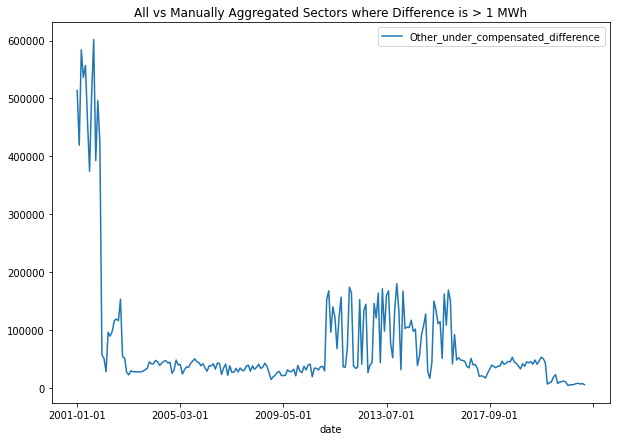

In [ ]:
# Low level of detail
_ = (
compare.reset_index()[["date","Other_under_compensated_difference"]]
.query(f'Other_under_compensated_difference > {MWh_threshold}')
.groupby("date")
.max()
.plot(title=f"All vs Manually Aggregated Sectors where Difference is > {MWh_threshold} MWh",figsize=(10,7))
)

In [ ]:
(compare.reset_index()[["date","state","plant_code","resource_detail_MWh","all_MWh","Other_under_compensated_difference"]]
 .query('(Other_under_compensated_difference > 500 &  Other_under_compensated_difference < 300000) & (date > "2001-01-01"  & date < "2021-01-01")')
 .sort_values("Other_under_compensated_difference",ascending=False))["state"].unique()

array(['IN', 'TX', 'OH', 'MO', 'LA', 'RI', 'FL', 'ME', 'CA', 'PA', 'VA',
       'IL', 'MI', 'AR', 'OR', 'NH', 'HI', 'MA', 'TN', 'WA', 'NY', 'CT',
       'AL', 'MN', 'ND', 'SC', 'NJ', 'WI', 'NM', 'MT', 'AK', 'MD', 'GA'],
      dtype=object)

In [ ]:
((compare.reset_index()[["date","state","plant_code","resource_detail_MWh","all_MWh","Other_under_compensated_difference"]])
.query('Other_under_compensated_difference >= 100000')
)


,date,state,plant_code,resource_detail_MWh,all_MWh,Other_under_compensated_difference
432638,2001-01-01,IL,876,76.000,513878.00,513802.000
432727,2001-02-01,IL,876,91.000,419318.00,419227.000
432816,2001-03-01,IL,876,66.000,584055.00,583989.000
432906,2001-04-01,IL,876,4345.000,540598.00,536253.000
432996,2001-05-01,IL,876,287.000,557111.00,556824.000
433086,2001-06-01,IL,876,153.000,461298.00,461145.000
433178,2001-07-01,IL,876,102.000,374337.00,374235.000
433272,2001-08-01,IL,876,63.000,506078.00,506015.000
433366,2001-09-01,IL,876,93.000,601745.00,601652.000
433460,2001-10-01,IL,876,104.000,392961.00,392857.000


In [ ]:
(df_plant_fuel_level_group.reset_index()[["date","state","plant_code","fuel_type","resource_detail_MWh"]])

,date,state,plant_code,fuel_type,resource_detail_MWh
0,2001-01-01,AK,62,WAT,1975.352
1,2001-01-01,AK,63,WAT,510.459
2,2001-01-01,AK,64,DFO,92.438
3,2001-01-01,AK,65,WAT,2252.210
4,2001-01-01,AK,66,DFO,5.555
...,...,...,...,...,...
1864419,2021-07-01,WY,57327,WND,16363.000
1864420,2021-07-01,WY,57551,WAT,1920.000
1864421,2021-07-01,WY,57703,NG,30667.000
1864422,2021-07-01,WY,60130,NG,2145.000


## Over Compensated

In [ ]:
# Get all plants that have under compensated mWh by more than MWh_threshold

MWh_threshold = 1
plants_with_remaining_MWh = (
                            compare.query(f'over_compensated_difference > {MWh_threshold}')
                            .reset_index()["plant_code"].unique().tolist()
                            )

#Select random sample
print(len(plants_with_remaining_MWh))
np.random.choice(plants_with_remaining_MWh,7,replace=False)

12


array([  533,  2144,  1595, 57317,  3548, 50043, 50190])

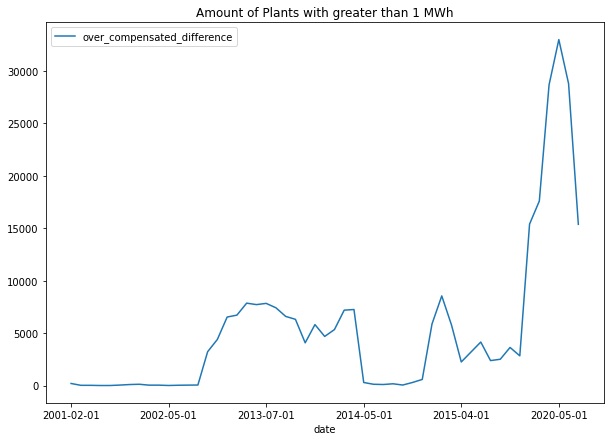

In [ ]:
# Lowever level of detail
_ = (
compare.reset_index()[["date","over_compensated_difference"]]
.query(f'over_compensated_difference > {MWh_threshold}')
.groupby("date")
.sum()
.plot(title=f"Amount of Plants with greater than {MWh_threshold} MWh",figsize=(10,7))
)

### Analysis - Over Compensated Plant

In [ ]:
# Keep our number - no change

(compare.reset_index()[["date","state","plant_code","resource_detail_MWh","all_MWh","over_compensated_difference"]]
 .query('over_compensated_difference > 3000'))

,date,state,plant_code,resource_detail_MWh,all_MWh,over_compensated_difference
271566,2013-01-01,CO,57317,6446.000,3223.00,3223.000
271692,2013-02-01,CO,57317,8794.000,4397.00,4397.000
271818,2013-03-01,CO,57317,13056.000,6528.00,6528.000
271944,2013-04-01,CO,57317,13420.000,6710.00,6710.000
272070,2013-05-01,CO,57317,15706.000,7853.00,7853.000
272197,2013-06-01,CO,57317,15426.000,7713.00,7713.000
272325,2013-07-01,CO,57317,15660.000,7830.00,7830.000
272453,2013-08-01,CO,57317,14820.000,7410.00,7410.000
272583,2013-09-01,CO,57317,13178.000,6589.00,6589.000
272713,2013-10-01,CO,57317,12622.000,6311.00,6311.000


## Remove Over OH Solar and CO Wind Indexes

#### CO - Doubled Assign to Solar

In [ ]:

CO_wind_indexes = list(df_plant_fuel_level_group.reset_index().query('state == "CO" & plant_code == "57317" & (date >= "2012-11-01" & date <= "2014-01-01") & fuel_type == "WND"').index)

#### OH - Doubled Assign to Wind

In [ ]:

OH_wind_indexes = list(df_plant_fuel_level_group.reset_index().query('state == "OH" & plant_code == "62944" & (date >= "2020-01-01" & date <= "2021-12-01") & fuel_type == "SUN"').index)

#### LA - No Pattern - **Leave alone and state in paper**

In [ ]:
df_plant_fuel_level_group.reset_index().query('state == "LA" & plant_code == "50489" & (date >= "2015-01-01" & date <= "2015-12-01")')

,state,date,plant_code,fuel_type,year,resource_detail_MWh
744197,LA,2015-01-01,50489,NG,2015,132012.319
744198,LA,2015-01-01,50489,OG,2015,30462.381
744199,LA,2015-01-01,50489,OTH,2015,4095.456
744339,LA,2015-02-01,50489,NG,2015,139946.775
744340,LA,2015-02-01,50489,OG,2015,24529.485
744341,LA,2015-02-01,50489,OTH,2015,6540.544
744481,LA,2015-03-01,50489,NG,2015,165241.974
744482,LA,2015-03-01,50489,OG,2015,24987.166
744483,LA,2015-03-01,50489,OTH,2015,4306.286
744623,LA,2015-04-01,50489,NG,2015,134207.634


# Remove OH plant 62944 Solar and CO plant 57317 Wind Indexes

In [ ]:
df_plant_fuel_level_over_trim_merge_ready = df_plant_fuel_level.drop(index=OH_wind_indexes + CO_wind_indexes)

assert len(df_plant_fuel_level) - len(df_plant_fuel_level_over_trim_merge_ready) == len(OH_wind_indexes) + len(CO_wind_indexes)

df_plant_fuel_level_over_trim_merge_ready.head()

,series_id,name,f,source,lat,lon,latlon,updated,country,state,resource_detail_MWh,date,year,plant_code,fuel_type,description
0,ELEC.PLANT.GEN.589-DFO-ALL.M,Net generation : J C McNeil (589) : distillate...,M,"EIA, U.S. Energy Information Administration",44.4917,-73.208056,"44.4917,-73.208056",2021-09-23T14:54:35-0400,USA,VT,0.0,2021-07-01,2021,589,DFO,NaN
1,ELEC.PLANT.GEN.589-DFO-ALL.M,Net generation : J C McNeil (589) : distillate...,M,"EIA, U.S. Energy Information Administration",44.4917,-73.208056,"44.4917,-73.208056",2021-09-23T14:54:35-0400,USA,VT,0.0,2021-06-01,2021,589,DFO,NaN
2,ELEC.PLANT.GEN.589-DFO-ALL.M,Net generation : J C McNeil (589) : distillate...,M,"EIA, U.S. Energy Information Administration",44.4917,-73.208056,"44.4917,-73.208056",2021-09-23T14:54:35-0400,USA,VT,0.0,2021-05-01,2021,589,DFO,NaN
3,ELEC.PLANT.GEN.589-DFO-ALL.M,Net generation : J C McNeil (589) : distillate...,M,"EIA, U.S. Energy Information Administration",44.4917,-73.208056,"44.4917,-73.208056",2021-09-23T14:54:35-0400,USA,VT,0.0,2021-04-01,2021,589,DFO,NaN
4,ELEC.PLANT.GEN.589-DFO-ALL.M,Net generation : J C McNeil (589) : distillate...,M,"EIA, U.S. Energy Information Administration",44.4917,-73.208056,"44.4917,-73.208056",2021-09-23T14:54:35-0400,USA,VT,0.0,2021-03-01,2021,589,DFO,NaN


In [ ]:
compare_under_compensated_index_reset = compare.reset_index().query('Other_under_compensated_difference > 1')[["state","date","year","plant_code","Other_under_compensated_difference"]]

df_compare_assign_fuel_type = (compare_under_compensated_index_reset
                               .merge(df_plant_fuel_level_over_trim_merge_ready,on=["state","date","year","plant_code"])
                               .drop(columns=["fuel_type","resource_detail_MWh"])
                               .rename(columns={"Other_under_compensated_difference":"resource_detail_MWh","year":"Year"})
                               )

df_compare_assign_fuel_type["fuel_type"] = "OUC_custom"

df_compare_assign_fuel_type.head()

,state,date,Year,plant_code,resource_detail_MWh,series_id,name,f,source,lat,lon,latlon,updated,country,description,fuel_type
0,AK,2002-01-01,2002,7841,1806.130,ELEC.PLANT.GEN.7841-JF-ALL.M,Net generation : Valdez Cogen (7841) : jet fue...,M,"EIA, U.S. Energy Information Administration",61.0839,-146.2529,"61.0839,-146.2529",2021-09-23T14:54:35-0400,USA,NaN,OUC_custom
1,AK,2002-01-01,2002,54422,999.226,ELEC.PLANT.GEN.54422-DFO-ALL.M,Net generation : Unisea G 2 (54422) : distilla...,M,"EIA, U.S. Energy Information Administration",53.8796,-166.5532,"53.8796,-166.5532",2021-09-23T14:54:35-0400,USA,NaN,OUC_custom
2,AK,2002-02-01,2002,7841,1536.724,ELEC.PLANT.GEN.7841-JF-ALL.M,Net generation : Valdez Cogen (7841) : jet fue...,M,"EIA, U.S. Energy Information Administration",61.0839,-146.2529,"61.0839,-146.2529",2021-09-23T14:54:35-0400,USA,NaN,OUC_custom
3,AK,2002-02-01,2002,54422,842.773,ELEC.PLANT.GEN.54422-DFO-ALL.M,Net generation : Unisea G 2 (54422) : distilla...,M,"EIA, U.S. Energy Information Administration",53.8796,-166.5532,"53.8796,-166.5532",2021-09-23T14:54:35-0400,USA,NaN,OUC_custom
4,AK,2002-03-01,2002,7841,1627.962,ELEC.PLANT.GEN.7841-JF-ALL.M,Net generation : Valdez Cogen (7841) : jet fue...,M,"EIA, U.S. Energy Information Administration",61.0839,-146.2529,"61.0839,-146.2529",2021-09-23T14:54:35-0400,USA,NaN,OUC_custom


In [ ]:
df_plant_fuel_level_over_trim = pd.concat([df_plant_fuel_level_over_trim_merge_ready,df_compare_assign_fuel_type])

In [ ]:
energy_grid.plant_fuel_type_agg_tags.keys()

dict_keys(['WAT', 'BIT', 'SUB', 'WC', 'LIG', 'SC', 'SGC', 'RC', 'MSB', 'OBS', 'LFG', 'AB', 'SLW', 'OBG', 'WDS', 'BLQ', 'PG', 'WO', 'OG', 'KER', 'RFO', 'JF', 'BFG', 'TDF', 'PC', 'DFO', 'WND', 'SUN', 'NUC', 'NG', 'GEO', 'MWH', 'MSN', 'MSW', 'OTH', 'PUR', 'WH'])

In [ ]:
def assign_fuel_type_agg(fuel_type):

    if fuel_type in energy_grid.plant_fuel_type_agg_tags.keys():

        return energy_grid.plant_fuel_type_agg_tags[fuel_type].replace(" ","_")

    else:

        return fuel_type


In [ ]:
df_plant_fuel_level_over_trim["agg_fuel_type"] = df_plant_fuel_level_over_trim["fuel_type"].apply(lambda fuel_type: assign_fuel_type_agg(fuel_type))

In [ ]:
df_plant_fuel_level_over_trim.sample(5)

,series_id,name,f,source,lat,lon,latlon,updated,country,state,resource_detail_MWh,date,year,plant_code,fuel_type,description,Year,agg_fuel_type
1763978,ELEC.PLANT.GEN.55237-NG-ALL.M,Net generation : Energy Shelby County (55237) ...,M,"EIA, U.S. Energy Information Administration",39.279400,-88.477200,"39.2794,-88.4772",2021-09-23T14:54:35-0400,USA,IL,22101.095,2018-07-01,2018.0,55237,NG,Natural Gas;,NaN,Natural_Gas
1174716,ELEC.PLANT.GEN.59180-SUN-ALL.M,Net generation : Marion Solar LNG (59180) : so...,M,"EIA, U.S. Energy Information Administration",39.913056,-86.238056,"39.913056,-86.238056",2021-09-23T14:54:35-0400,USA,IN,86.601,2015-11-01,2015.0,59180,SUN,All solar powered electricity generation (incl...,NaN,Solar
287388,ELEC.PLANT.GEN.3631-DFO-ALL.M,Net generation : Sam Rayburn (3631) : distilla...,M,"EIA, U.S. Energy Information Administration",28.894700,-97.135000,"28.8947,-97.135",2021-09-23T14:54:35-0400,USA,TX,3.969,2004-04-01,2004.0,3631,DFO,NaN,NaN,Oil_Gas
70958,ELEC.PLANT.GEN.2297-DFO-ALL.M,Net generation : Plainview Muncipal Power (229...,M,"EIA, U.S. Energy Information Administration",42.350000,-97.790556,"42.35,-97.790556",2021-09-23T14:54:35-0400,USA,NE,8.033,2006-08-01,2006.0,2297,DFO,NaN,NaN,Oil_Gas
82130,ELEC.PLANT.GEN.3142-DFO-ALL.M,Net generation : TalenEnergy Martins Creek LLC...,M,"EIA, U.S. Energy Information Administration",40.689064,-76.219639,"40.689064,-76.219639",2021-09-23T14:54:35-0400,USA,PA,13.617,2005-03-01,2005.0,3142,DFO,NaN,NaN,Oil_Gas


In [ ]:
# Single level groupby to get the Plant MWh Net Generation Sum for each Fuel type
df_MWh_agg_fuel_type = (df_plant_fuel_level_over_trim[["state","year","agg_fuel_type","resource_detail_MWh"]]
                    .groupby(["state","year","agg_fuel_type"]).sum()
                    .reset_index()
                    )

# Double level groupby to get the Plant MWh Net Generation across all Fuel Types
df_total_MWh_agg_fuel_type = (df_plant_fuel_level_over_trim[["state","year","agg_fuel_type","resource_detail_MWh"]]
                    .groupby(["state","year","agg_fuel_type"]).sum()
                    .rename(columns={"resource_detail_MWh":"Agg_total_plant_MWh"})
                    .reset_index()
                    .groupby(["state","year"]).sum()
                    .reset_index()
                    )


# Single level groupby to get the Plant Count for each Fuel type
df_count_agg_fuel_type = (df_plant_fuel_level_over_trim[["state","year","agg_fuel_type","source"]]
                    .groupby(["state","year","agg_fuel_type"]).count()
                    .rename(columns={"source":"count"})
                    .reset_index()
                    )

# Double level groupby to get the Plant Count across all Fuel Types
df_total_count_agg_fuel_type = (df_plant_fuel_level_over_trim[["state","year","agg_fuel_type","source"]]
                    .groupby(["state","year","agg_fuel_type"]).count()
                    .rename(columns={"source":"Agg_total_plant_count"})
                    .reset_index()
                    .groupby(["state","year"]).sum()
                    .reset_index()
                    )

In [ ]:
# Add prefixes and suffixes to column resource names and fill na values

df_MWh_agg_fuel_type_pivoted = (df_MWh_agg_fuel_type[["state","year","agg_fuel_type","resource_detail_MWh"]]
     .pivot_table(index=["state","year"], columns="agg_fuel_type")
     .droplevel(0,axis=1).add_prefix("Agg_R_").add_suffix("_MWh")
     .fillna(0)
     .T
     
)

# Add prefixes and suffixes to column resource names and fill na values

df_count_agg_fuel_type_pivoted = (df_count_agg_fuel_type[["state","year","agg_fuel_type","count"]]
     .pivot_table(index=["state","year"], columns="agg_fuel_type")
     .droplevel(0,axis=1).add_prefix("Agg_R_").add_suffix("_count")
     .fillna(0)
     .T
     
)


In [ ]:
# Example dataframe to be filled in. 
df_MWh_agg_fuel_type_pivoted.head()

state                               AK               ...            WY              
year                            2001.0       2002.0  ...        2020.0        2021.0
agg_fuel_type                                        ...                            
Agg_R_Biomass_MWh                0.000     1031.000  ...  0.000000e+00  0.000000e+00
Agg_R_Coal_MWh              320199.883   575287.841  ...  3.100487e+07  1.740713e+07
Agg_R_Geothermal_MWh             0.000        0.000  ...  0.000000e+00  0.000000e+00
Agg_R_Hydroelectric_MWh    1338980.000  1439351.001  ...  1.013500e+04  5.176000e+03
Agg_R_Municipal_Waste_MWh        0.000        0.000  ...  0.000000e+00  0.000000e+00

[5 rows x 1061 columns]

In [ ]:
# Creates tuple of all three columns
iterate = tuple(zip(df_total_MWh_agg_fuel_type.state,
                    df_total_MWh_agg_fuel_type.year,
                    df_total_MWh_agg_fuel_type.Agg_total_plant_MWh)
                )

# Creates a copy of the dataframe to overwrite the data with percentage
df_percentage_MWh = df_MWh_agg_fuel_type_pivoted.copy()

# Iterate through each state, year, and value pair and calculate the percentage
for state, year, value in iterate:

    df_percentage_MWh[state,year] = round(df_percentage_MWh[state,year] / value,3)

# Check if all column total sum to the length of df
assert round(df_percentage_MWh.sum().sum()) == len(df_percentage_MWh.T)

In [ ]:
# Creates tuple of all three columns
iterate = tuple(zip(df_total_count_agg_fuel_type.state,
                    df_total_count_agg_fuel_type.year,
                    df_total_count_agg_fuel_type.Agg_total_plant_count)
                )

# Creates a copy of the dataframe to overwrite the data with percentage
df_percentage_count = df_count_agg_fuel_type_pivoted.copy()

# Iterate through each state, year, and value pair and calculate the percentage
for state, year, value in iterate:

    df_percentage_count[state,year] = round(df_percentage_count[state,year] / value,3)

# Check if all column total sum to the length of df
assert round(df_percentage_count.sum().sum()) == len(df_percentage_count.T)

In [ ]:
df_MWh_count_percentage_fuel_type_pivoted = (df_percentage_MWh.T
                                      .merge(df_percentage_count.T,left_index=True,right_index=True,how="left")
                                    )


In [ ]:
df_MWh_count_percentage_fuel_type_pivoted.head(10)

agg_fuel_type  Agg_R_Biomass_MWh  ...  Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_count
state year                        ...                                                                       
AK    2001.0                 0.0  ...                                                0.0                    
      2002.0                 0.0  ...                                                0.0                    
      2003.0                 0.0  ...                                                0.0                    
      2004.0                 0.0  ...                                                0.0                    
      2005.0                 0.0  ...                                                0.0                    
      2006.0                 0.0  ...                                                0.0                    
      2007.0                 0.0  ...                                                0.0                    
      2008.0                 0.0  ...                                                0.0                    
      2009.0                 0.0  ...                                                0.0                    
      2010.0                 0.0  ...                                                0.0                    

[10 rows x 24 columns]

In [ ]:
import plotly.express as px

px.line(df_total_MWh_agg_fuel_type.sort_values("year"),"year","Agg_total_plant_MWh",color="state")

In [ ]:
import plotly.express as px

px.line(df_total_count_agg_fuel_type.sort_values("year"),"year","Agg_total_plant_count",color="state")

In [ ]:
df_complete = (df_MWh_count_percentage_fuel_type_pivoted
               .merge(df_total_count_agg_fuel_type.set_index(["state","year"]),left_index=True,right_index=True,how="left")
               .merge(df_total_MWh_agg_fuel_type.set_index(["state","year"]),left_index=True,right_index=True,how="left")
               .query('year >= 2001')
               .reset_index()
               .set_index(["state","year"])
                )

df_complete = df_complete[sorted(df_complete.columns)] #Order columns in alpha order


df_complete

Agg_R_Biomass_MWh  ...  Agg_total_plant_count
state year                       ...                       
AK    2001.0                0.0  ...                   1032
      2002.0                0.0  ...                   1368
      2003.0                0.0  ...                   1353
      2004.0                0.0  ...                   1416
      2005.0                0.0  ...                   1416
...                         ...  ...                    ...
WY    2017.0                0.0  ...                    984
      2018.0                0.0  ...                    997
      2019.0                0.0  ...                   1020
      2020.0                0.0  ...                    456
      2021.0                0.0  ...                    266

[1061 rows x 26 columns]

# Validation of count summing to 1 or very close

In [ ]:
# Example scaled to percentage of state plants validation for count percentages

df_complete[[x for x in df_complete if "count" in x and "Agg" not in x]].sample().T.sum()

state  year  
VA     2002.0    0.0
dtype: float64

# Validation of MWh summing to 1 or very close

In [ ]:
# Example scaled to percentage of state plants validation for count percentages

df_complete[[x for x in df_complete if "MWh" in x and "Agg" not in x]].sample().T.sum()

state  year  
SD     2010.0    0.0
dtype: float64

# Save Power Plant File

In [ ]:
df_complete["year"] = df_complete.reset_index()["year"].astype('int32')

In [ ]:
df_complete

Agg_R_Biomass_MWh  ...  year
state year                       ...      
AK    2001.0                0.0  ...   NaN
      2002.0                0.0  ...   NaN
      2003.0                0.0  ...   NaN
      2004.0                0.0  ...   NaN
      2005.0                0.0  ...   NaN
...                         ...  ...   ...
WY    2017.0                0.0  ...   NaN
      2018.0                0.0  ...   NaN
      2019.0                0.0  ...   NaN
      2020.0                0.0  ...   NaN
      2021.0                0.0  ...   NaN

[1061 rows x 27 columns]

In [ ]:
df_complete.to_csv("data/merge_ready/annual_agg_powerplant_netgeneration_2001_2021.csv",index=True)

In [ ]:
df_complete[df_complete["year"] >= 2008]


,,Agg_R_Biomass_MWh,Agg_R_Biomass_count,Agg_R_Coal_MWh,Agg_R_Coal_count,Agg_R_Geothermal_MWh,Agg_R_Geothermal_count,Agg_R_Hydroelectric_MWh,Agg_R_Hydroelectric_count,Agg_R_Municipal_Waste_MWh,Agg_R_Municipal_Waste_count,Agg_R_Natural_Gas_MWh,Agg_R_Natural_Gas_count,Agg_R_Nuclear_MWh,Agg_R_Nuclear_count,Agg_R_Oil_Gas_MWh,Agg_R_Oil_Gas_count,Agg_R_Other_MWh,Agg_R_Other_count,Agg_R_Solar_MWh,Agg_R_Solar_count,Agg_R_Wind_MWh,Agg_R_Wind_count,Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_MWh,Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_count,Agg_total_plant_MWh,Agg_total_plant_count,year
state,year,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [ ]:
df_high_level = pd.read_csv("data/merge_ready/annual_agg_powerplant_netgeneration_2001_2021.csv")

df_high_level

,state,year,Agg_R_Biomass_MWh,Agg_R_Biomass_count,Agg_R_Coal_MWh,Agg_R_Coal_count,Agg_R_Geothermal_MWh,Agg_R_Geothermal_count,Agg_R_Hydroelectric_MWh,Agg_R_Hydroelectric_count,Agg_R_Municipal_Waste_MWh,Agg_R_Municipal_Waste_count,Agg_R_Natural_Gas_MWh,Agg_R_Natural_Gas_count,Agg_R_Nuclear_MWh,Agg_R_Nuclear_count,Agg_R_Oil_Gas_MWh,Agg_R_Oil_Gas_count,Agg_R_Other_MWh,Agg_R_Other_count,Agg_R_Solar_MWh,Agg_R_Solar_count,Agg_R_Wind_MWh,Agg_R_Wind_count,Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_MWh,Agg_R_batteries_or_other_use_of_electricity_as_an_energy_source_count,Agg_total_plant_MWh,Agg_total_plant_count,year.1
0,AK,2001.0,0.0,0.000,0.058,0.035,0.0,0.0,0.243,0.256,0.0,0.0,0.543,0.093,0.0,0.0,0.157,0.605,0.000,0.000,0.000,0.000,0.000,0.012,0.0,0.0,5.517773e+06,1032,NaN
1,AK,2002.0,0.0,0.009,0.101,0.044,0.0,0.0,0.252,0.219,0.0,0.0,0.489,0.079,0.0,0.0,0.159,0.649,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,5.721068e+06,1368,NaN
2,AK,2003.0,0.0,0.009,0.075,0.035,0.0,0.0,0.261,0.222,0.0,0.0,0.528,0.066,0.0,0.0,0.136,0.668,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,6.074421e+06,1353,NaN
3,AK,2004.0,0.0,0.008,0.100,0.042,0.0,0.0,0.230,0.212,0.0,0.0,0.557,0.076,0.0,0.0,0.113,0.661,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.0,6.503244e+06,1416,NaN
4,AK,2005.0,0.0,0.008,0.095,0.042,0.0,0.0,0.223,0.220,0.0,0.0,0.568,0.076,0.0,0.0,0.113,0.644,0.000,0.000,0.000,0.000,0.000,0.008,0.0,0.0,6.555075e+06,1416,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1056,WY,2017.0,0.0,0.000,0.857,0.159,0.0,0.0,0.024,0.183,0.0,0.0,0.016,0.220,0.0,0.0,0.009,0.171,0.001,0.012,0.000,0.000,0.092,0.256,0.0,0.0,4.673337e+07,984,NaN
1057,WY,2018.0,0.0,0.000,0.861,0.169,0.0,0.0,0.021,0.181,0.0,0.0,0.019,0.217,0.0,0.0,0.009,0.169,0.002,0.012,0.000,0.001,0.088,0.253,0.0,0.0,4.610587e+07,997,NaN
1058,WY,2019.0,0.0,0.000,0.839,0.176,0.0,0.0,0.024,0.176,0.0,0.0,0.024,0.212,0.0,0.0,0.008,0.165,0.002,0.012,0.004,0.012,0.099,0.247,0.0,0.0,4.214566e+07,1020,NaN
1059,WY,2020.0,0.0,0.000,0.908,0.289,0.0,0.0,0.000,0.026,0.0,0.0,0.035,0.211,0.0,0.0,0.012,0.263,0.002,0.026,0.005,0.026,0.037,0.158,0.0,0.0,3.413598e+07,456,NaN


In [ ]:
# Agg simplification to avoid creating an agg file
 
#Goal - Look through all columns determine which columns stay and get added together

# identify all unique agg_fuel_types

# Return all keys with the value of a fuel_type

# combine all columns with that agg fuel_type

# drop all the columns

